In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
#倒入一些必要的库

In [59]:
#读取数据
df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [60]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:-1,:]
y=df.iloc[1:,-1]
print(X.shape)
print(y.shape)

(26276, 4)
(26276,)


In [61]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['target'])
x=X
input_size=len(x.iloc[1,:])
cut=len(y)//10#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
x.iloc[:-cut]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

94596
10508
23649
2627


In [62]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, y_train)

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Train Data')

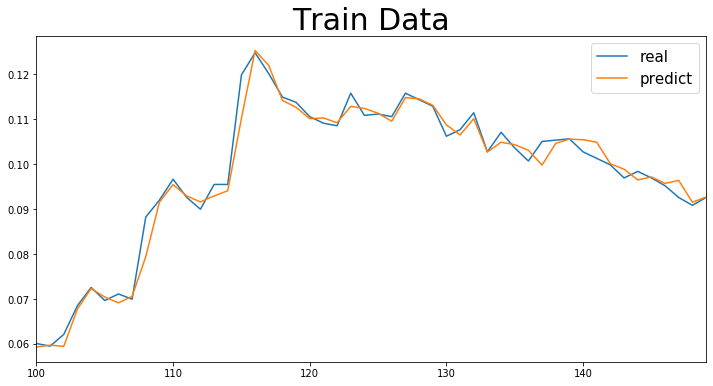

In [63]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
#展示在训练集上的表现 
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

Text(0.5, 1.0, 'Test Data')

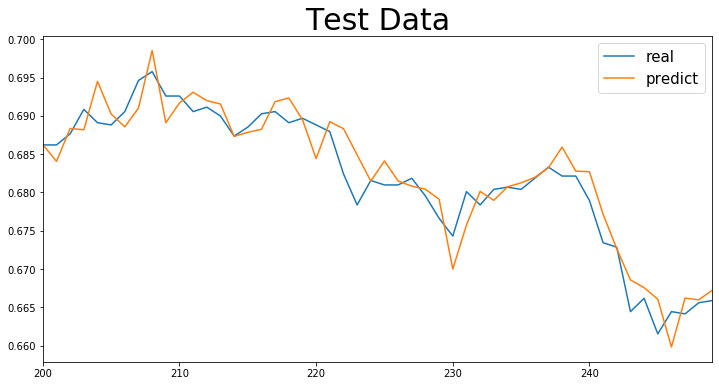

In [64]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
#展示在测试集上的表现 
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题

In [65]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test[:,0]) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',5.25)

训练集上的MAE/MSE/MAPE
0.001454770038688701
9.849520741832657e-06
0.4356293732145011
测试集上的MAE/MSE/MAPE
0.0028320922612233503
2.2520405388876335e-05
0.3975481690193962
预测涨跌正确: 0.5129474485910129
训练时间（秒）: 5.25


In [66]:
#建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(16,input_dim=input_size,init='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(4,init='uniform')) #中间层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 256) #训练模型nb_epoch=50次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=4, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/50
23649/23649 [==============================] - 0s 21us/step - loss: 0.1698
Epoch 2/50
23649/23649 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 3/50
23649/23649 [==============================] - 0s 7us/step - loss: 0.0030
Epoch 4/50
23649/23649 [==============================] - 0s 8us/step - loss: 4.3595e-04
Epoch 5/50
23649/23649 [==============================] - 0s 6us/step - loss: 6.2868e-05
Epoch 6/50
23649/23649 [==============================] - 0s 6us/step - loss: 3.8850e-05
Epoch 7/50
23649/23649 [==============================] - 0s 7us/step - loss: 3.6529e-05
Epoch 8/50
23649/23649 [==============================] - ETA: 0s - loss: 3.2806e-0 - 0s 7us/step - loss: 3.5865e-05
Epoch 9/50
23649/23649 [==============================] - 0s 7us/step - loss: 3.5621e-05
Epoch 10/50
23649/23649 [==============================] - 0s 6us/step - loss: 3.5340e-05
Epoch 11/50
23649/23649 [==============================] - 0s 8us/step - loss: 3.5192e-05
Ep

Text(0.5, 1.0, 'Train Data')

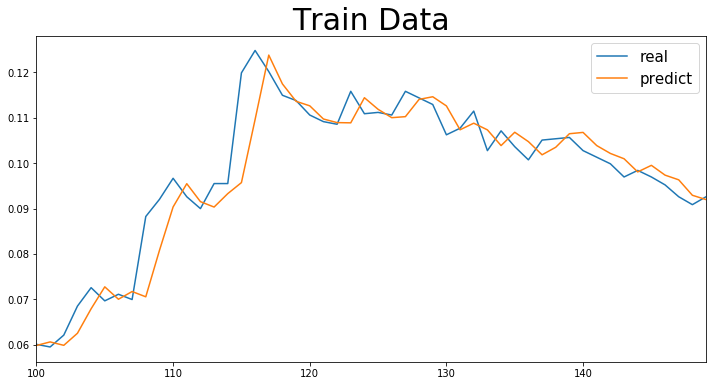

In [67]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

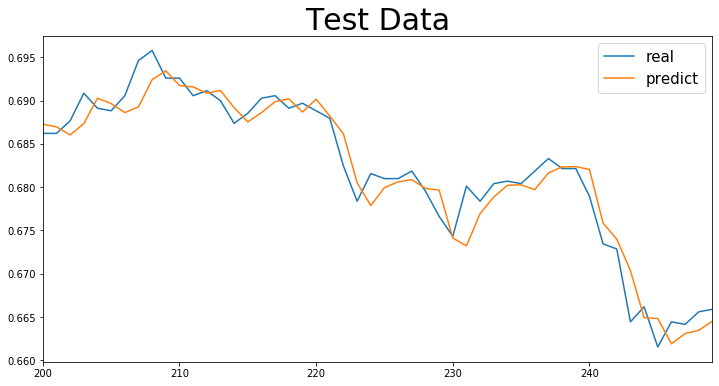

In [68]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [69]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test[:,0]) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',15.25)

训练集上的MAE/MSE/MAPE
0.002691642716962675
2.7746375227467365e-05
0.9295248114276882
测试集上的MAE/MSE/MAPE
0.002296980684764339
1.697952940874071e-05
0.3234409319372815
预测涨跌正确: 0.48476770753998477
训练时间（秒）: 15.25


In [93]:
#设置LSTM、GRU的时间窗
window=3
#处理LSTM数据
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [94]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#建立GRU模型 训练
d = 0.01
model = Sequential()
model.add(LSTM(8, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 100, batch_size = 256) #训练模型1000次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
E:\anoconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
E:\anoconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/100
23646/23646 [==============================] - 2s 68us/step - loss: 0.2300 - accuracy: 4.2290e-05
Epoch 2/100
23646/23646 [==============================] - 0s 18us/step - loss: 0.0211 - accuracy: 8.4581e-05
Epoch 3/100
23646/23646 [==============================] - 0s 18us/step - loss: 0.0055 - accuracy: 8.4581e-05
Epoch 4/100
23646/23646 [==============================] - 0s 17us/step - loss: 0.0014 - accuracy: 8.4581e-05
Epoch 5/100
23646/23646 [==============================] - 0s 18us/step - loss: 6.7577e-04 - accuracy: 8.4581e-05
Epoch 6/100
23646/23646 [==============================] - 0s 18us/step - loss: 6.1154e-04 - accuracy: 8.4581e-05
Epoch 7/100
23646/23646 [==============================] - 0s 16us/step - loss: 6.0544e-04 - accuracy: 8.4581e-05
Epoch 8/100
23646/23646 [==============================] - 0s 18us/step - loss: 5.8413e-04 - accuracy: 8.4581e-05
Epoch 9/100
23646/23646 [==============================] - 0s 20us/step - loss: 5.6086e-04 - accuracy: 8

23646/23646 [==============================] - 0s 13us/step - loss: 4.9368e-05 - accuracy: 8.4581e-05
Epoch 73/100
23646/23646 [==============================] - 0s 13us/step - loss: 4.5973e-05 - accuracy: 8.4581e-05
Epoch 74/100
23646/23646 [==============================] - 0s 14us/step - loss: 5.1806e-05 - accuracy: 8.4581e-05
Epoch 75/100
23646/23646 [==============================] - 0s 14us/step - loss: 4.2971e-05 - accuracy: 8.4581e-05
Epoch 76/100
23646/23646 [==============================] - 0s 14us/step - loss: 4.4806e-05 - accuracy: 8.4581e-05
Epoch 77/100
23646/23646 [==============================] - 0s 13us/step - loss: 4.6723e-05 - accuracy: 8.4581e-05
Epoch 78/100
23646/23646 [==============================] - 0s 15us/step - loss: 3.8650e-05 - accuracy: 8.4581e-05
Epoch 79/100
23646/23646 [==============================] - 0s 15us/step - loss: 4.7904e-05 - accuracy: 8.4581e-05
Epoch 80/100
23646/23646 [==============================] - 0s 17us/step - loss: 4.3170e-05 -

Text(0.5, 1.0, 'Train Data')

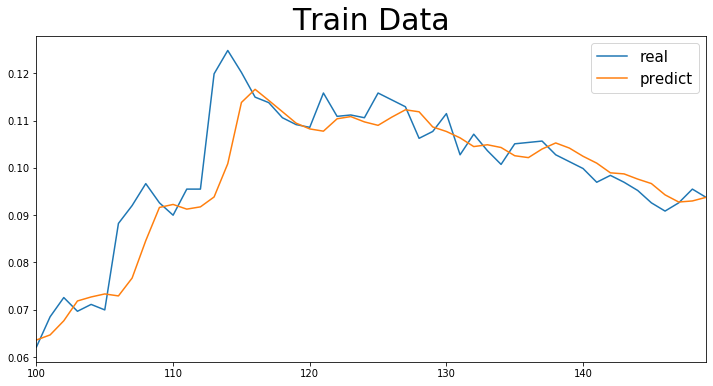

In [95]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

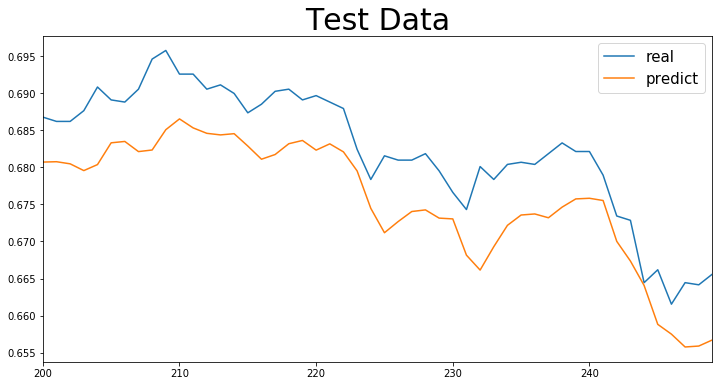

In [96]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [97]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',54.56)

训练集上的MAE/MSE/MAPE
0.00587782158696923
6.037339508331648e-05
1.4689078557501452
测试集上的MAE/MSE/MAPE
0.007071762860833229
6.52329376617015e-05
1.0022656161863452
预测涨跌正确: 0.49047981721249045
训练时间（秒）: 54.56


In [98]:
#建立GRU模型 训练
from keras.layers.recurrent import GRU
d = 0.01
model = Sequential()
model.add(GRU(8, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 100, batch_size = 256) #训练模型1000次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  import sys
E:\anoconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
23646/23646 [==============================] - 1s 45us/step - loss: 0.2256 - accuracy: 4.2290e-05
Epoch 2/50
23646/23646 [==============================] - 0s 14us/step - loss: 0.0263 - accuracy: 8.4581e-05
Epoch 3/50
23646/23646 [==============================] - 0s 13us/step - loss: 0.0106 - accuracy: 8.4581e-05
Epoch 4/50
23646/23646 [==============================] - 0s 15us/step - loss: 0.0034 - accuracy: 8.4581e-05
Epoch 5/50
23646/23646 [==============================] - 0s 13us/step - loss: 6.5981e-04 - accuracy: 8.4581e-05
Epoch 6/50
23646/23646 [==============================] - 0s 13us/step - loss: 5.2766e-04 - accuracy: 8.4581e-05
Epoch 7/50
23646/23646 [==============================] - 0s 13us/step - loss: 4.8781e-04 - accuracy: 8.4581e-05
Epoch 8/50
23646/23646 [==============================] - 0s 14us/step - loss: 4.3305e-04 - accuracy: 8.4581e-05
Epoch 9/50
23646/23646 [==============================] - 0s 13us/step - loss: 4.1132e-04 - accuracy: 8.4581e-05

Text(0.5, 1.0, 'Train Data')

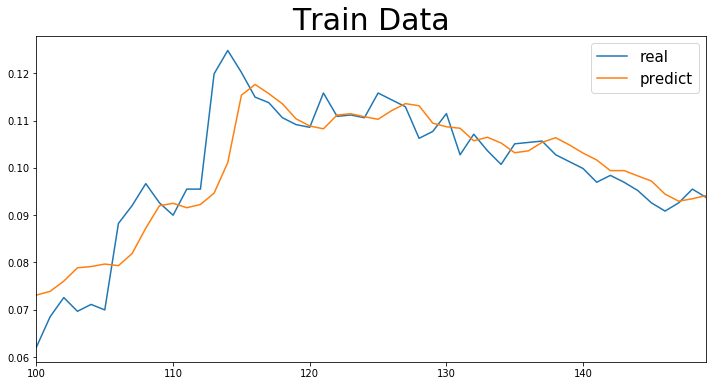

In [99]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

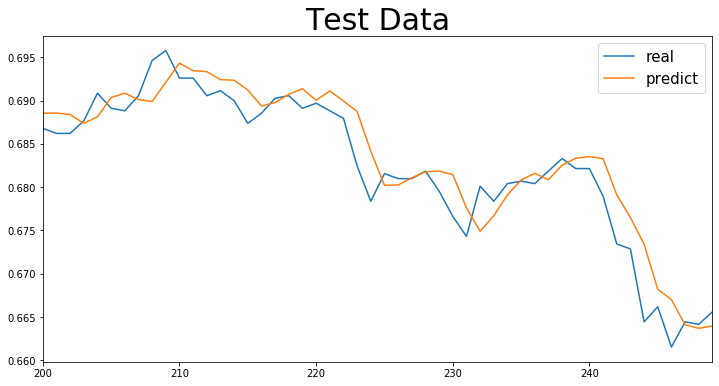

In [100]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [101]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',145.25)

训练集上的MAE/MSE/MAPE
0.0033768356101913748
4.158031305168184e-05
1.2380447738729803
测试集上的MAE/MSE/MAPE
0.002605778358716256
1.8768738222660634e-05
0.3665130123429902
预测涨跌正确: 0.46953541507996954
训练时间（秒）: 145.25
